# CSE 6040, Fall 2015 [08]: Data analysis and visualization

In todays class, we will first introduce a data analysis tools called **Pandas**,
and then show how to visualize the data using a module called **Seaborn**.

Most of the examples come from 
[Pandas tutorial](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
and
[Seaborn tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html).


## Part 1: Data analysis using Pandas
Pandas is pre-installed with Anaconda. 
Let's try to import it.

In [12]:
import pandas as pd

## Create Data
The data set will consist of 5 baby names and the number of births recorded for that year (1880).

In [2]:
# The inital set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

To merge these two lists together we will use the zip function.

In [3]:
BabyDataSet = zip(names,births)
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

We are basically done creating the data set. We now will use the **pandas** library to export this data set into a csv file.

We will create a DataFrame object. You can think of this object holding the contents of the BabyDataSet in a format similar to an excel spreadsheet.

In [4]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Export the dataframe to a ***csv*** file. We can name the file ***births1880.csv***. The function ***to_csv*** will be used to export the file. The file will be saved in the same location of the notebook unless specified otherwise.

In [5]:
df.to_csv('births1880.csv',index=False,header=False)

## Get Data
To pull in the csv file, we will use the pandas function *read_csv*. Let us take a look at this function and what inputs it takes.

In [6]:
df = pd.read_csv("births1880.csv")
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


This brings us the our first problem of the exercise. The ***read_csv*** function treated the first record in the csv file as the header names. This is obviously not correct since the text file did not provide us with header names.  

To correct this we will pass the ***header*** parameter to the *read_csv* function and set it to ***None*** (means null in python).

In [7]:
df = pd.read_csv("births1880.csv", header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


If we wanted to give the columns specific names, we would have to pass another paramter called ***names***. We can also omit the *header* parameter.

In [8]:
df = pd.read_csv("births1880.csv", names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


It is also possible to read in a csv file by passing an url address
Here we use the famous [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/bigmlcom/bigmler/master/data/iris.csv")
df.head(10)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Analyze Data

In [11]:
# show basic statistics
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Select a column
df["sepal length"].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length, dtype: float64

In [13]:
# select columns
df[["sepal length", "petal width"]].head()

,sepal length,petal width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


In [14]:
# select rows by name
df.loc[5:10]

,sepal length,sepal width,petal length,petal width,species
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


In [15]:
# select rows by position
df.iloc[5:10]

,sepal length,sepal width,petal length,petal width,species
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [16]:
# select rows by condition
df[df["sepal length"] > 5.0]

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa


We can get the maximum sepal length by

In [17]:
df["sepal length"].max()

7.9

If we want to find full information of the flower with maximum sepal length

In [18]:
df.sort("sepal length", ascending=False).head(1)

,sepal length,sepal width,petal length,petal width,species
131,7.9,3.8,6.4,2,Iris-virginica


## Exercise 
Print the full information of the flower whose petal length is the second shortest in the 50 Iris-setosa flowers

In [25]:
df.sort("petal length", ascending=True)
df.iloc[1]

sepal length            4.9
sepal width               3
petal length            1.4
petal width             0.2
species         Iris-setosa
Name: 1, dtype: object

Pandas also has some basic plotting functions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f89b810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fcacbd0>]], dtype=object)

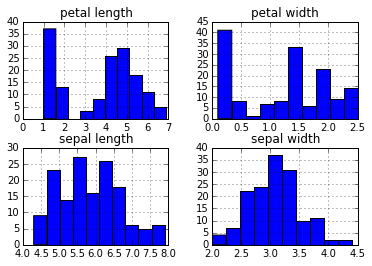

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist()

# Part 2: Visualization using Seaborn
Seaborn is not installed by default in Anaconda.

Try install it using pip: **pip install seaborn**.

In [1]:
import seaborn as sns

# make the plots to show right below the codes
% matplotlib inline

## Plotting univariate distributions
 distplot() function will draw a histogram and fit a kernel density estimate

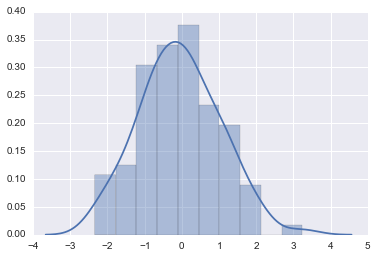

In [2]:
import numpy as np
x = np.random.normal(size=100)
sns.distplot(x)

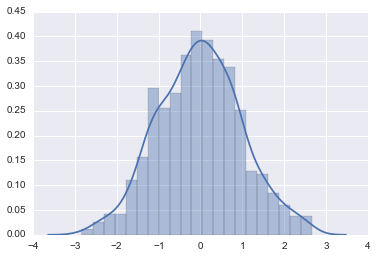

In [10]:
import random
x = [random.normalvariate (0, 1) for i in range (0, 1000)]
sns.distplot (x)

## Plotting bivariate distributions

In [16]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

### Scatter plot

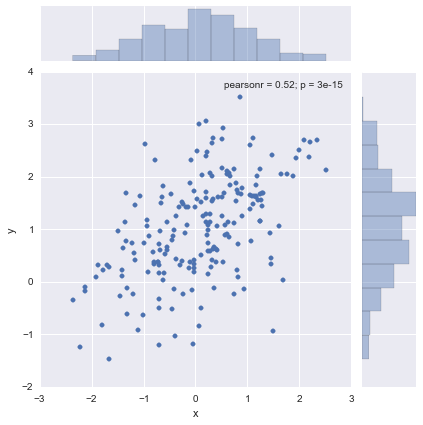

In [17]:
sns.jointplot(x="x", y="y", data=df)

### Hexbin plot

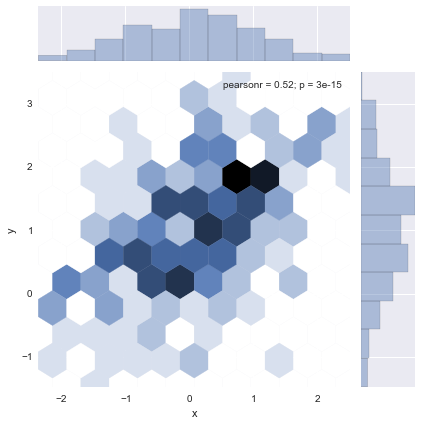

In [18]:
sns.jointplot(x="x", y="y", data=df, kind="hex")

### Kernel density estimation

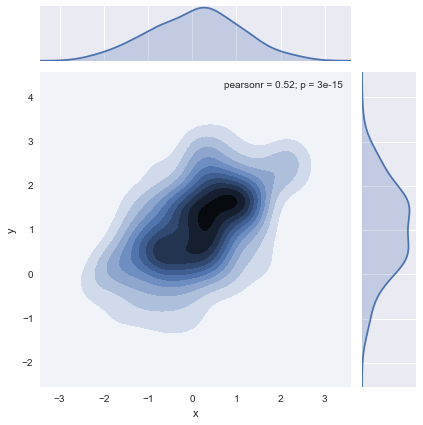

In [19]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

## Visualizing pairwise relationships in a dataset
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

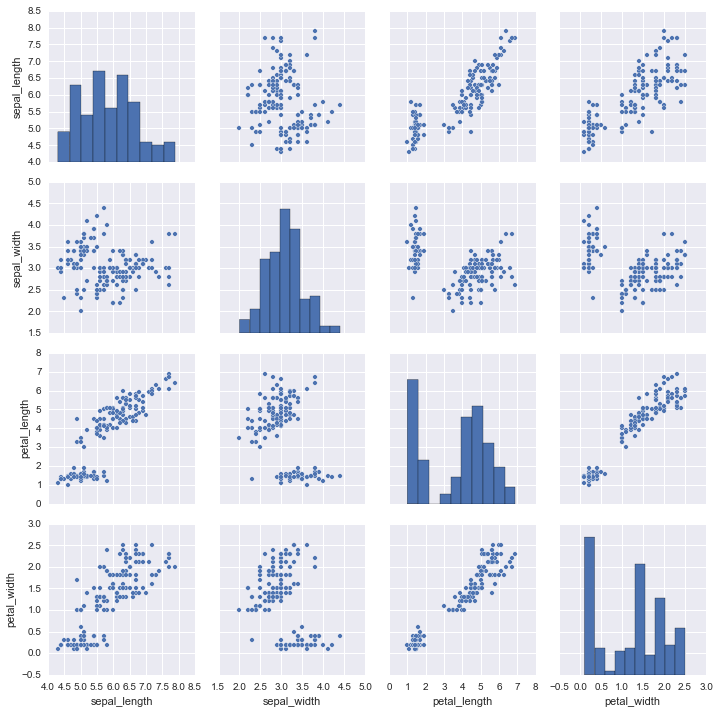

In [21]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

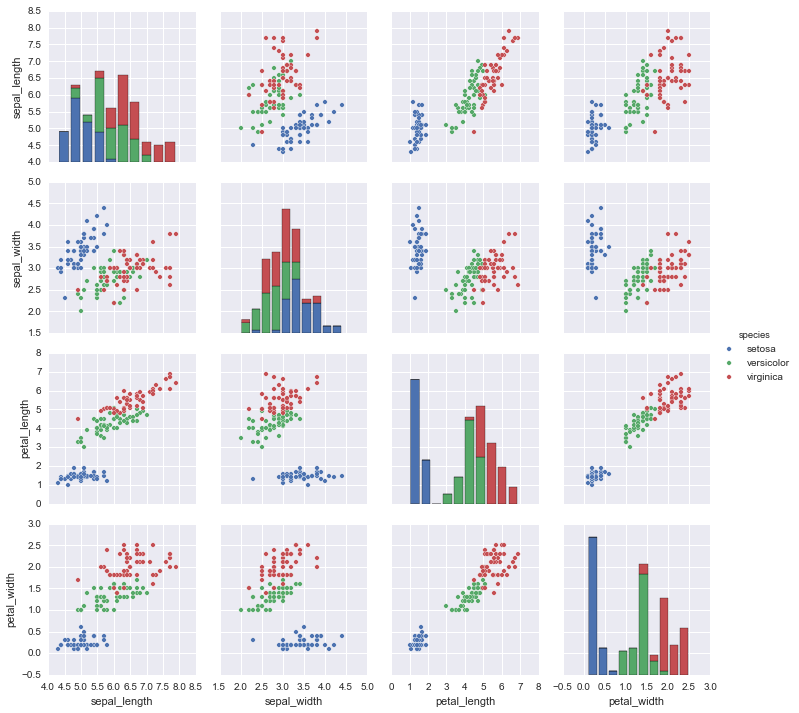

In [22]:
# we can add colors to different species
sns.pairplot(iris, hue="species")

### Visualizing linear relationships

In [23]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can use the function `regplot` to show the linear relationship between total_bill and tip. 
It also shows the 95% confidence interval.

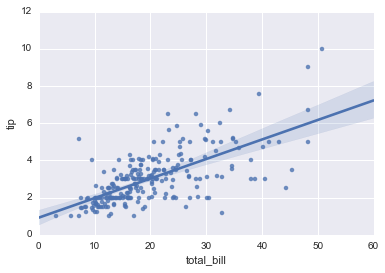

In [24]:
sns.regplot(x="total_bill", y="tip", data=tips)

### Visualizing higher order relationships

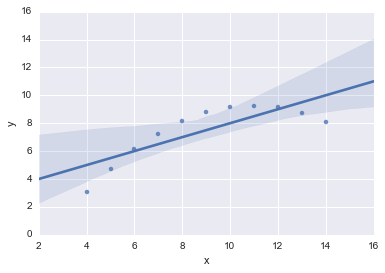

In [25]:
anscombe = sns.load_dataset("anscombe")
sns.regplot(x="x", y="y", data=anscombe[anscombe["dataset"] == "II"])

The plot clearly shows that this is not a good model.
Let's try to fit a polynomial regression model with degree 2.

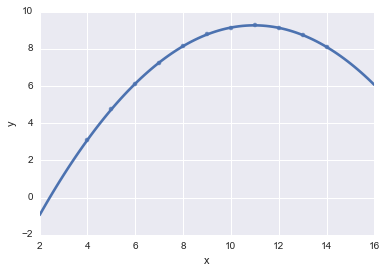

In [164]:
sns.regplot(x="x", y="y", data=anscombe[anscombe["dataset"] == "II"], order=2)

### Strip mplots
This is similar to scatter plot but used when one variable is categorical.

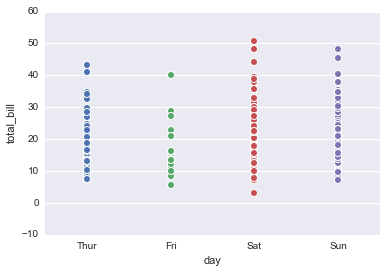

In [168]:
sns.stripplot(x="day", y="total_bill", data=tips)

### Boxplots

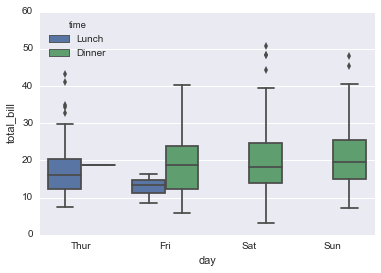

In [169]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

### Bar plots

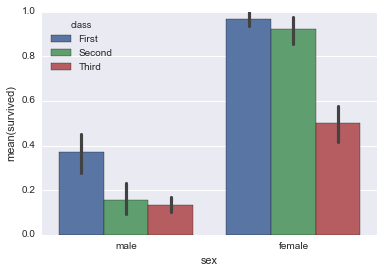

In [170]:
titanic = sns.load_dataset("titanic")
sns.barplot(x="sex", y="survived", hue="class", data=titanic)